<a href="https://colab.research.google.com/github/2303A52060/23CSBTB39-40/blob/main/LAB_EXAM(ANSWER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     891.000000    1.000000    3.000000  

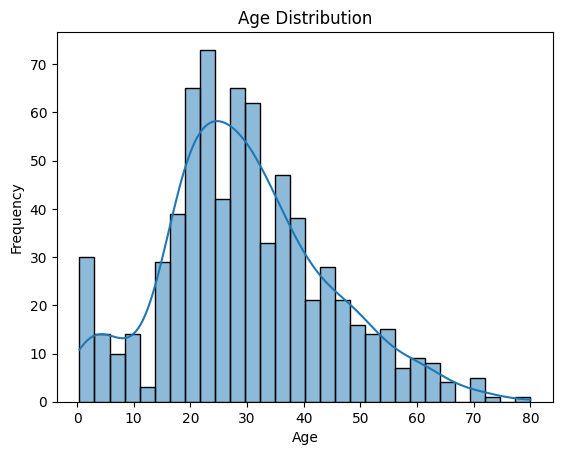

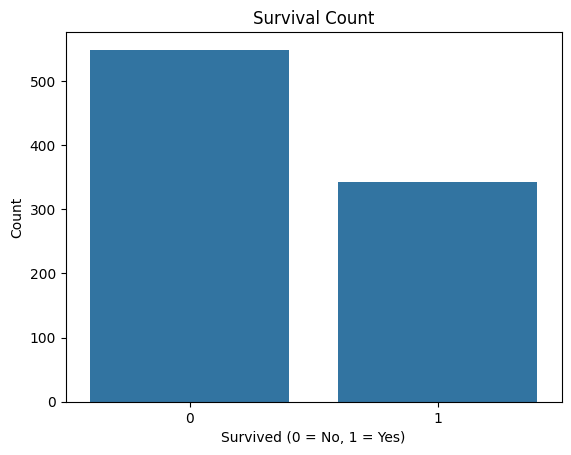

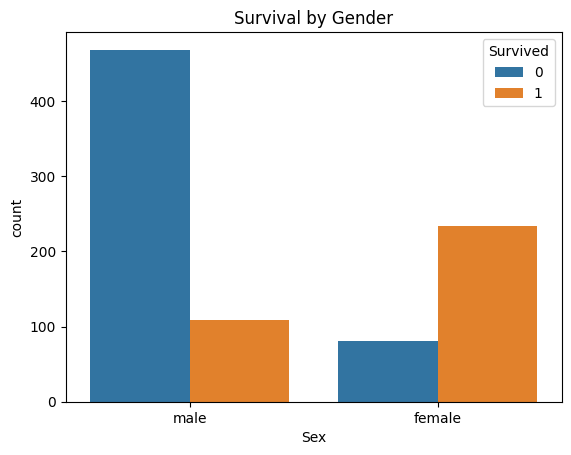

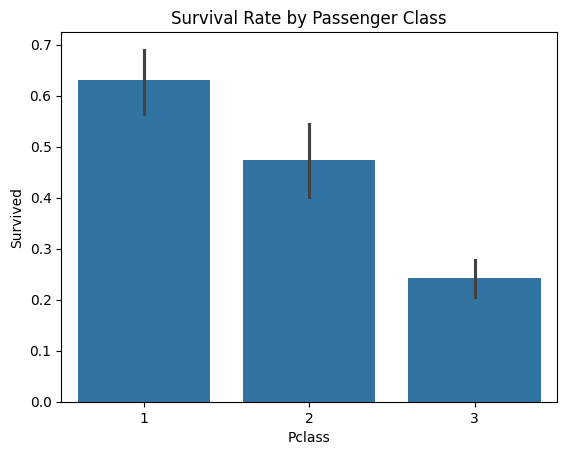

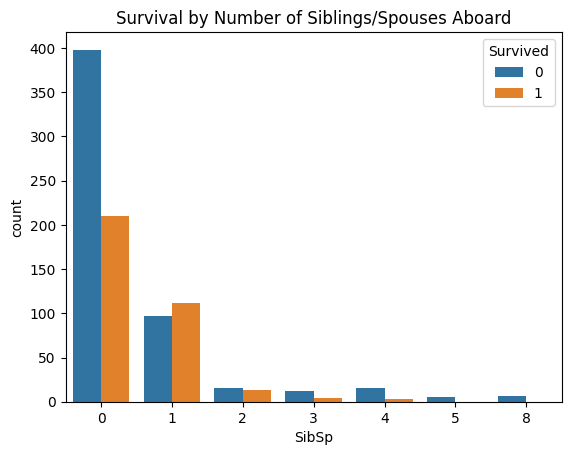

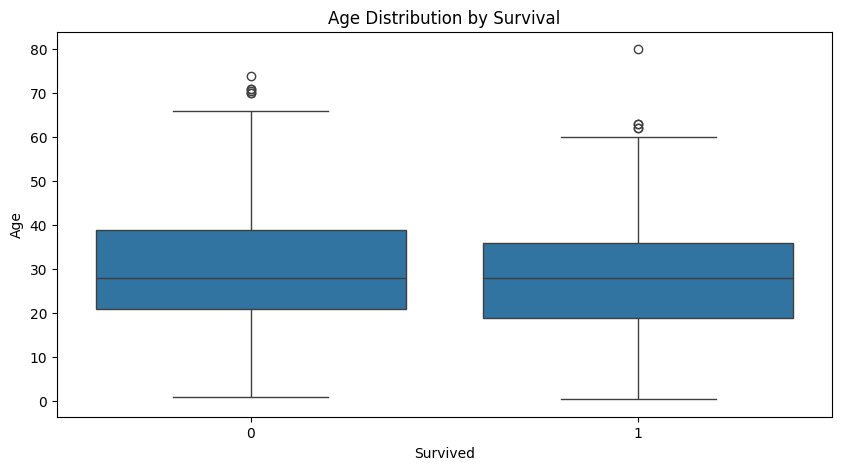

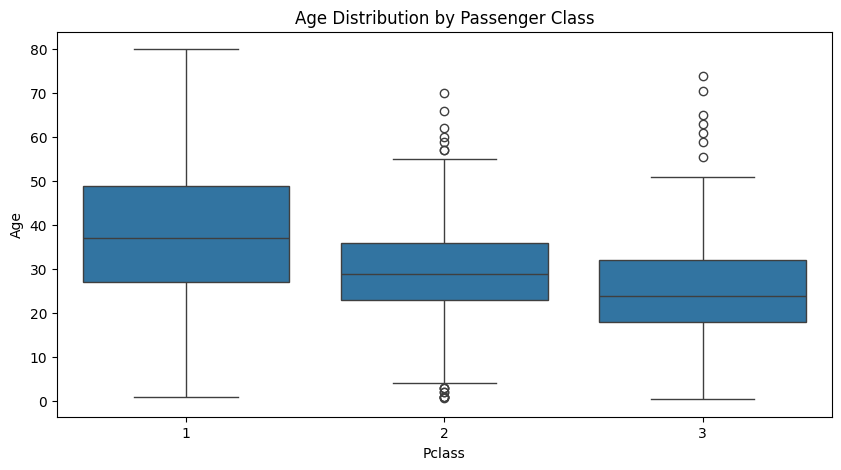

<ipython-input-1-859f8d354653>:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)



Cleaned DataFrame:
    PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    0  22.0      1      0   7.2500   
1            2         1       1    1  38.0      1      0  71.2833   
2            3         1       3    1  26.0      0      0   7.9250   
3            4         1       1    1  35.0      1      0  53.1000   
4            5         0       3    0  35.0      0      0   8.0500   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


<ipython-input-1-859f8d354653>:113: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


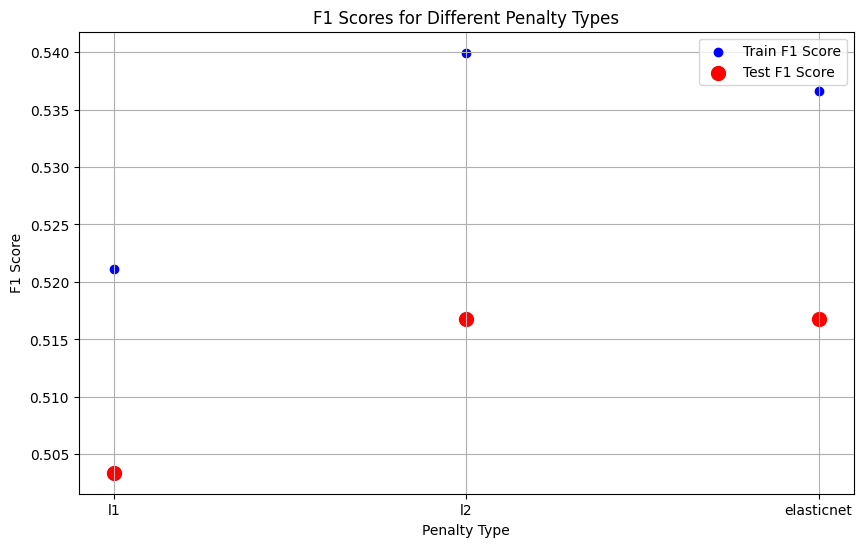

In [1]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic Ship Passengers dataset into a dataframe
df = pd.read_csv('titanic_train.csv')

# 1. Check the data types of each feature (column) in the dataset
print("\nData Types:\n", df.dtypes)

# 2. Generate a summary of the dataset
summary = df.describe(percentiles=[.25, .5, .75, .90])
print("\nSummary Statistics:\n", summary)

# 3. List the names of columns/features in the dataset
column_names = df.columns.tolist()
print("\nColumn Names:", column_names)

# 4. Exploratory Analysis
# Plotting numeric features
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Relative size of survived/un-survived
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Check survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Class-wise survival rate
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Siblings/Spouses aboard vs Survival
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival by Number of Siblings/Spouses Aboard')
plt.show()

# Overall age distribution with boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

# Class-wise age distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()

# 5. Data Wrangling
# Impute age data
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop unnecessary features
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Recode categorical features to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Display the cleaned dataframe
print("\nCleaned DataFrame:\n", df.head())

# At this point, you can proceed to fit a Logistic Regression model using the cleaned DataFrame.

2.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Create a synthetic Titanic-like dataset
np.random.seed(42)  # For reproducibility

# Sample size
n = 1000

# Generate synthetic data
data = {
    'PassengerId': np.arange(1, n+1),
    'Pclass': np.random.choice([1, 2, 3], size=n),
    'Sex': np.random.choice(['male', 'female'], size=n),
    'Age': np.random.randint(1, 80, size=n),
    'SibSp': np.random.randint(0, 5, size=n),
    'Parch': np.random.randint(0, 5, size=n),
    'Fare': np.random.uniform(10, 500, size=n),
    'Embarked': np.random.choice(['C', 'Q', 'S'], size=n),
    'Survived': np.random.choice([0, 1], size=n)
}

df = pd.DataFrame(data)

# Data wrangling
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['Age'].fillna(df['Age'].median(), inplace=True)

# Features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize lists to store results
penalties = ['l1', 'l2', 'elasticnet']
f1_scores_train = []
f1_scores_test = []

# Use 'saga' solver for all penalties
for penalty in penalties:
    # Initialize the logistic regression model with appropriate solver and increased max_iter
    if penalty == 'elasticnet':
        model = LogisticRegression(penalty=penalty, solver='saga', max_iter=2000, l1_ratio=0.5)
    elif penalty == 'none':
        model = LogisticRegression(penalty=penalty, solver='lbfgs', max_iter=2000)  # Use 'lbfgs' or other solvers that support no penalty
    else:
        model = LogisticRegression(penalty=penalty, solver='liblinear', max_iter=2000)  # Use 'liblinear' for L1 and L2

    # Fit the model to the training data # This line is added
    model.fit(X_train_scaled, y_train)

    # Predict and compute F1 scores
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    f1_scores_train.append(f1_train)
    f1_scores_test.append(f1_test)

# Plot F1 scores
plt.figure(figsize=(10, 6))
plt.scatter(penalties, f1_scores_train, color='blue', label='Train F1 Score',)
plt.scatter(penalties, f1_scores_test, color='red', label='Test F1 Score', s=100)
plt.xlabel('Penalty Type')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Penalty Types')
plt.legend()
plt.grid(True)
plt.show()
